Dataset loaded with 1000 rows and 15 columns
Missing values in each column:
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
kt_status         0
status            0
dtype: int64


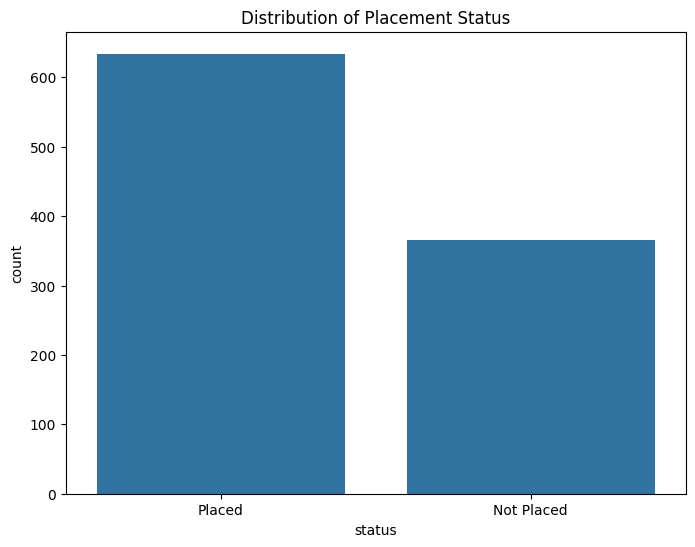

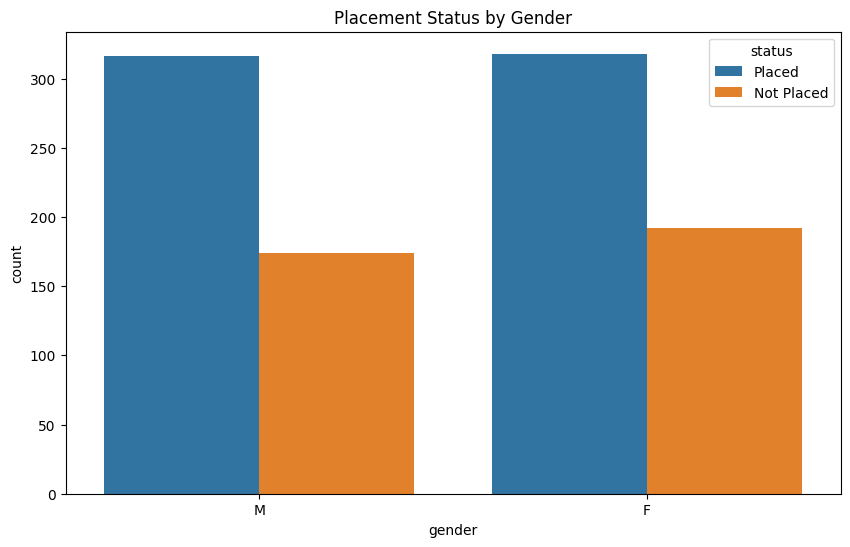

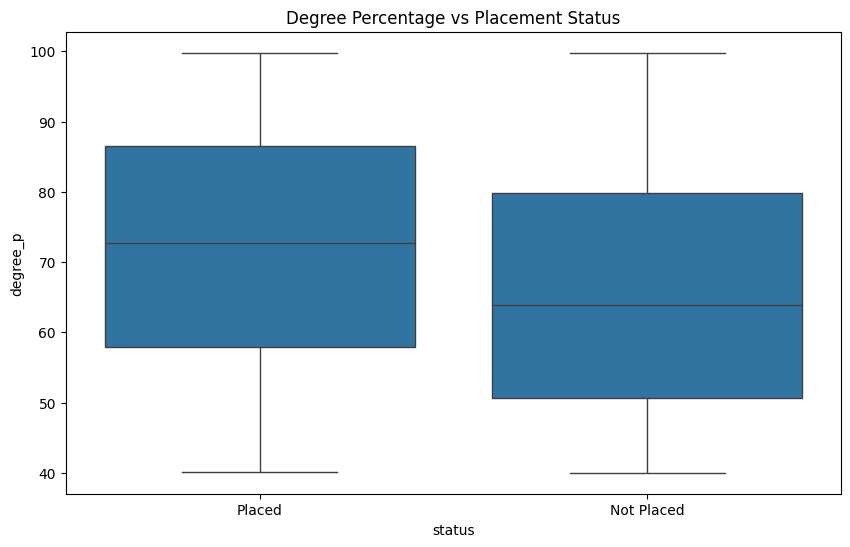

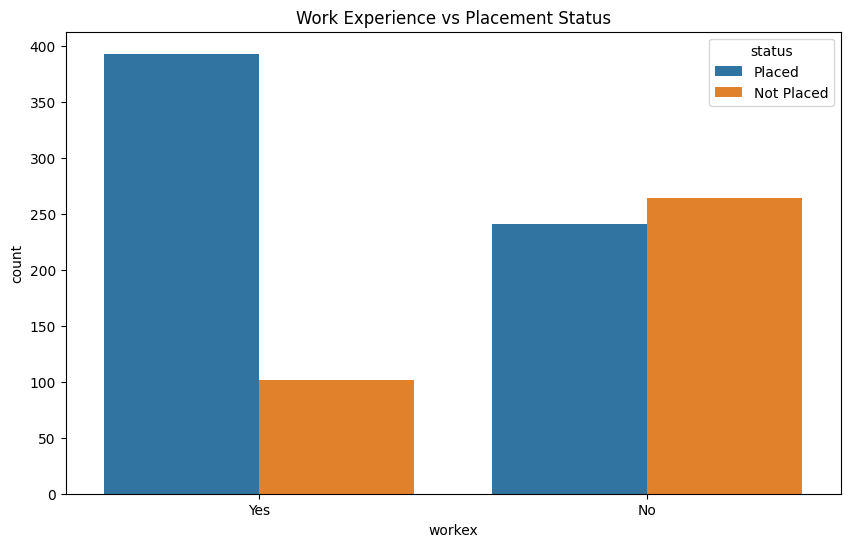

Model Accuracy: 0.815

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.70      0.81      0.75        68
      Placed       0.89      0.82      0.85       132

    accuracy                           0.81       200
   macro avg       0.79      0.81      0.80       200
weighted avg       0.83      0.81      0.82       200



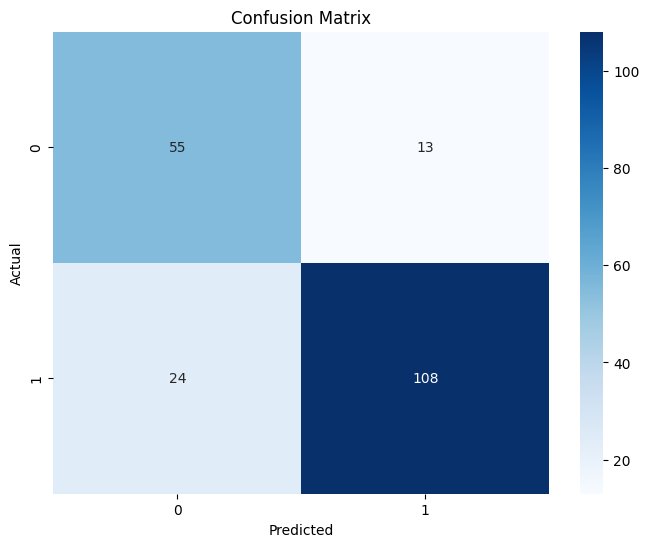

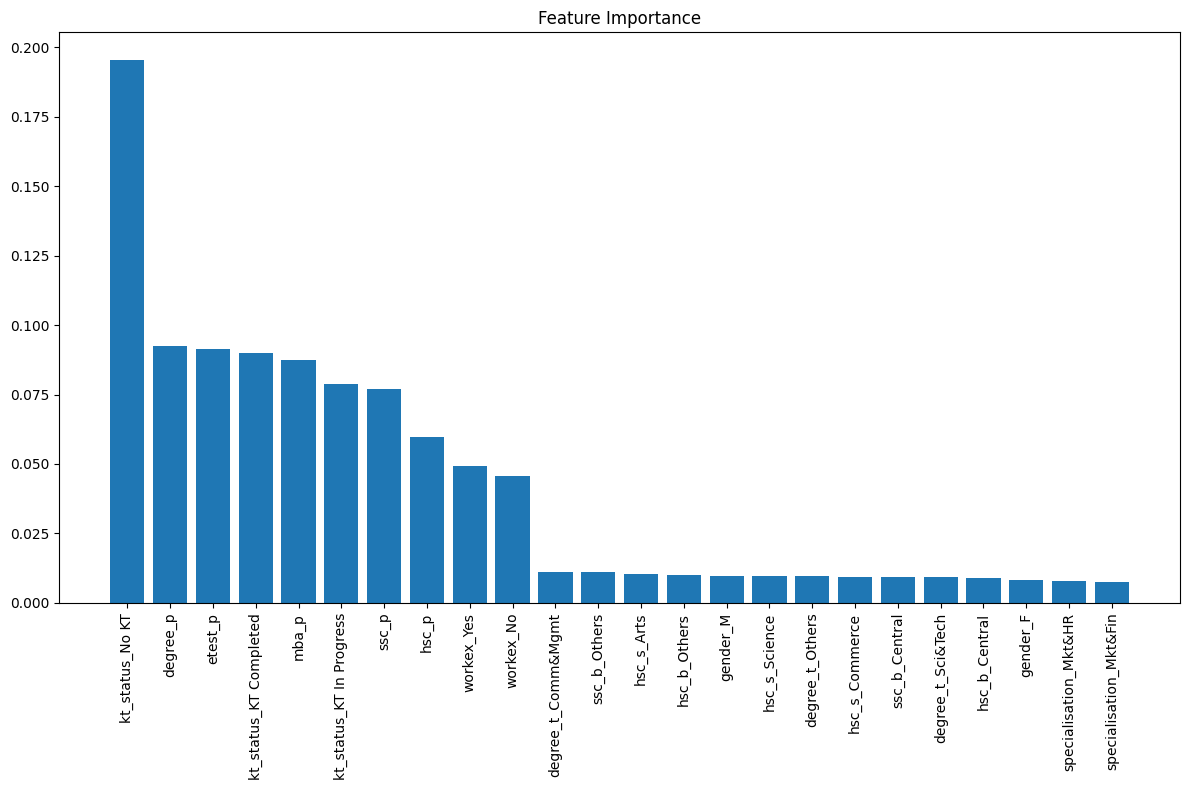

Model saved as 'job_placement_model.pkl'


In [6]:
# # Job Placement Prediction System
# 
# This notebook builds a machine learning model for predicting job placements based on student qualifications.

# ## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

# ## Load the Dataset
# If you haven't generated the dataset yet, run the cell above to create it
try:
    df = pd.read_csv('job_placement_dataset.csv')
    print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns")
except FileNotFoundError:
    print("Dataset not found. Please run the dataset generation code first.")

# ## Exploratory Data Analysis
# Display basic statistics and information
df.head()

# Data distribution
df.describe()

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Display distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Placement Status')
plt.show()

# Placement rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='status', data=df)
plt.title('Placement Status by Gender')
plt.show()

# Relationship between degree percentage and placement
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='degree_p', data=df)
plt.title('Degree Percentage vs Placement Status')
plt.show()

# Relationship between work experience and placement
plt.figure(figsize=(10, 6))
sns.countplot(x='workex', hue='status', data=df)
plt.title('Work Experience vs Placement Status')
plt.show()

# ## Data Preprocessing
# Separate features and target
X = df.drop(['status', 'sl_no'], axis=1)  # Remove ID and target
y = df['status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'kt_status']
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p','mba_p']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# ## Model Building
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ## Feature Importance
# Get feature names after preprocessing
numerical_features_transformed = numerical_features  # Standard scaler preserves names
categorical_features_transformed = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numerical_features_transformed + list(categorical_features_transformed)

# Get feature importance
importances = pipeline.named_steps['classifier'].feature_importances_

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



# ## Save the Model
# Save the pipeline (includes preprocessing steps and model)
joblib.dump(pipeline, 'job_placement_model.pkl')
print("Model saved as 'job_placement_model.pkl'")

# ## Create a Flask API to serve the model
